# Ejercicio 1: Estimacion ecuación lineal con dos parámetros
$y=\omega_1 · X_1 + \omega_2 · X_2 + cte.$



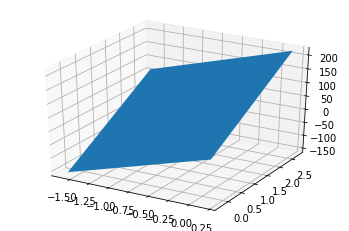

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


cte = 2
x,y, coef= datasets.make_regression(random_state=42,n_features=2,coef=True,bias=cte)
omega = coef[0]
omega2 = coef[1]


#Imprimimos

fig = plt.figure()
ax = fig.gca(projection='3d')

#Para el 3D hace falta un grid
X, Y = np.meshgrid(x[0],x[1])
Z = X*omega + Y*omega2 + cte

# Plot the surface.
ax.plot_surface(X, Y, Z)


plt.show()

# Ejercicio 2: Clasificación con Redes Neuronales
![iris](iris.png)
![plotiris](plot_iris.png)

Desde: https://www.datacamp.com/community/tutorials/machine-learning-in-r

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris_X, iris_y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [3]:
X_train[:3]

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5]])

In [4]:
y_train[:3]

array([1, 2, 1])

In [0]:
# One hot encoded variable Y
from tensorflow.keras.utils import to_categorical
dummy_y = to_categorical(y_train)

In [6]:
dummy_y[:3]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

# Ejercicio 3: CIFAR 10

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


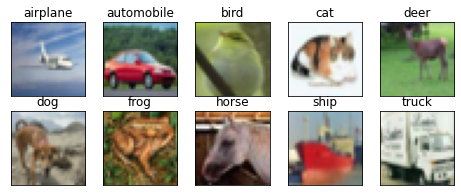

(32, 32, 3)


In [7]:
import tensorflow.keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
num_classes=10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (0, 1, 2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# De clase a one hot enconder.
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


input_shape= x_train.shape[1:]
print(input_shape)

# LSTM

Basado en https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/8.1-text-generation-with-lstm.ipynb

Descargar el quijote desde https://gist.github.com/jsdario/6d6c69398cb0c73111e49f1218960f79

Descargar las mil y una noches:
* http://www.gutenberg.org/cache/epub/47287/pg47287.txt
* http://www.gutenberg.org/cache/epub/47631/pg47631.txt
* https://www.gutenberg.org/files/48903/48903-0.txt

In [8]:
import tensorflow.keras as keras
import numpy as np
import random
import sys

keras.__version__

'2.3.0-tf'

In [9]:
# Descargar el texto
training_data_url = "https://gist.githubusercontent.com/jsdario/6d6c69398cb0c73111e49f1218960f79/raw/8d4fc4548d437e2a7203a5aeeace5477f598827d/el_quijote.txt"

!wget $training_data_url


--2020-06-02 12:42:03--  https://gist.githubusercontent.com/jsdario/6d6c69398cb0c73111e49f1218960f79/raw/8d4fc4548d437e2a7203a5aeeace5477f598827d/el_quijote.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1060259 (1.0M) [text/plain]
Saving to: ‘el_quijote.txt.1’

el_quijote.txt.1    100%[===================>]   1.01M  --.-KB/s    in 0.02s   

2020-06-02 12:42:03 (45.7 MB/s) - ‘el_quijote.txt.1’ saved [1060259/1060259]



In [10]:
# Se lee el quijote y se recorta si hace falta
short=True

text = open('el_quijote.txt').read().lower()
if short:
    text=text[0:20000]
print('Corpus length:', len(text))

Corpus length: 20000


In [11]:
# Se divide en frases de 60 caracteres

# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))

Number of sequences: 6647


In [12]:
sentences[54]

'a\nen un lugar de la mancha, de cuyo nombre no quiero acordar'

In [13]:
next_chars[54]

'm'

In [14]:
# Se cogen los caracteres que aparecen el texto
# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 42


In [15]:
chars[30:36]

['s', 't', 'u', 'v', 'x', 'y']

In [16]:
# Se realiza un one-hot encode
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    if i==54:
        print("frase ",i,":",sentence,"\n\nx[0:1]:")
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
        if i==54 and t<2:
            print(char,"=",char_indices[char]," one-hot=",x[i, t,:])
    y[i, char_indices[next_chars[i]]] = 1
    if i==54:
        print("\n\ny:",next_chars[i],"=",char_indices[next_chars[i]]," onehot=",y[i,:])

Vectorization...
frase  54 : a
en un lugar de la mancha, de cuyo nombre no quiero acordar 

x[0:1]:
a = 13  one-hot= [False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]

 = 0  one-hot= [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


y: m = 24  onehot= [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False]
